In [ ]:
import kagglehub
dataset_path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")
print("Path to dataset files:", dataset_path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf. config.experimental.set_memory_growth(physical_devices [0], True)
  print( 'GPU is Used!')
else:
  print('GPU is Unavailable!')

GPU is Used!


In [ ]:
train_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir = '/root/. cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'

In [ ]:
train_dir = os.path.join(dataset_path, 'the_wildfire_dataset_2n_version', 'train')
val_dir = os.path.join(dataset_path, 'the_wildfire_dataset_2n_version', 'val')
test_dir = os.path.join(dataset_path, 'the_wildfire_dataset_2n_version', 'test')


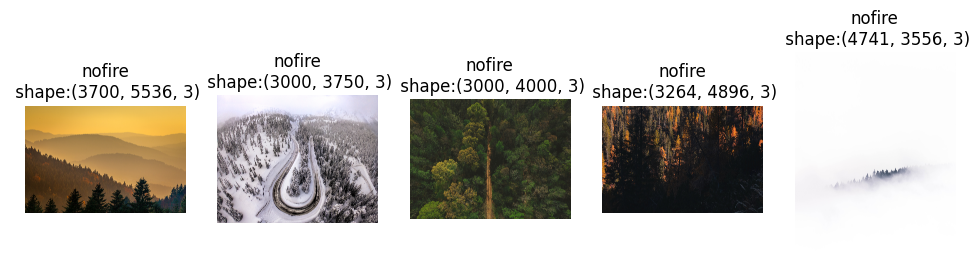

['nofire', 'fire']
2


In [ ]:
classes=os.listdir(train_dir)
num_classes=len(classes)
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  image_name=os.listdir(class_path)[i]
  image_path=os.path.join(class_path,image_name)
  image=plt.imread(image_path)
  plt.subplot(1,5,i+1)
  plt.imshow(image)  # Display the image
  plt.title(f'{classes[0]}\n shape:{image.shape}')  # Set the title
  plt.axis('off')
plt.show()
print(classes)
print(num_classes)

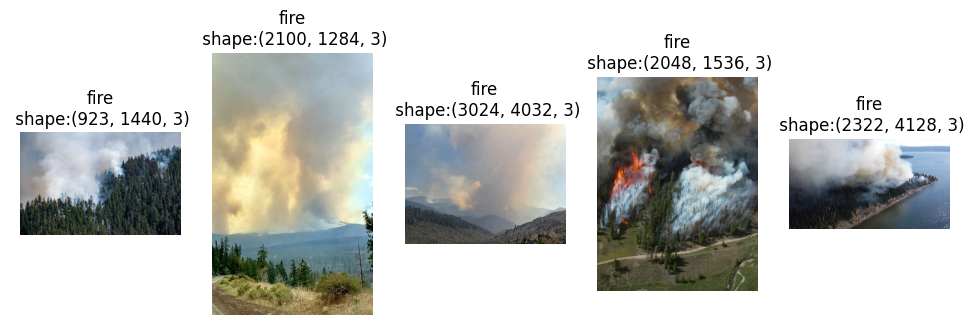

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  image_name = os.listdir(class_path)[i]
  image_path = os.path.join(class_path, image_name)
  image = plt.imread(image_path)
  plt.subplot(1, 5, i + 1)
  plt.imshow(image)  # Display the image
  plt.title(f'{classes[1]}\n shape:{image.shape}')  # Set the title as text
  plt.axis('off')
plt.show()

In [ ]:
img_width, img_height = 150, 150
batch_size = 32

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)


Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
class_mapping=train_generator.class_indices
class_names=list(class_mapping.keys())
print(class_names)

['fire', 'nofire']


In [ ]:
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
10/58 ━━━━━━━━━━━━━━━━━━━━ 5:21 7s/step - accuracy: 0.4810 - loss: 1.1577

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


44/58 ━━━━━━━━━━━━━━━━━━━━ 1:31 7s/step - accuracy: 0.5626 - loss: 0.8400

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 487s 8s/step - accuracy: 0.5780 - loss: 0.7915 - val_accuracy: 0.6823 - val_loss: 0.5774
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5000 - loss: 0.7488

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5000 - loss: 0.7488 - val_accuracy: 0.6849 - val_loss: 0.5660
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 503s 9s/step - accuracy: 0.7390 - loss: 0.5012 - val_accuracy: 0.7422 - val_loss: 0.5064
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7188 - loss: 0.6464 - val_accuracy: 0.7370 - val_loss: 0.5409
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 500s 9s/step - accuracy: 0.7588 - loss: 0.4912 - val_accuracy: 0.6953 - val_loss: 0.5250
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6875 - loss: 0.5290 - val_accuracy: 0.6901 - val_loss: 0.5189
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 507s 9s/step - accuracy: 0.7362 - loss: 0.5161 - val_accuracy: 0.7500 - val_loss: 0.4640
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.6250 - loss: 0.6485 - val_accuracy: 0.7760 - val_loss: 0.4541
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 449s 8s/step - accuracy: 0.7766 - loss: 0.4603 - val_accuracy: 0.7422 - val_loss: 0.4782

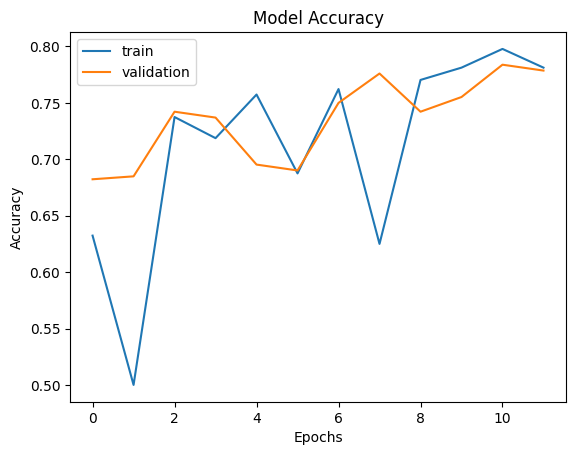

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

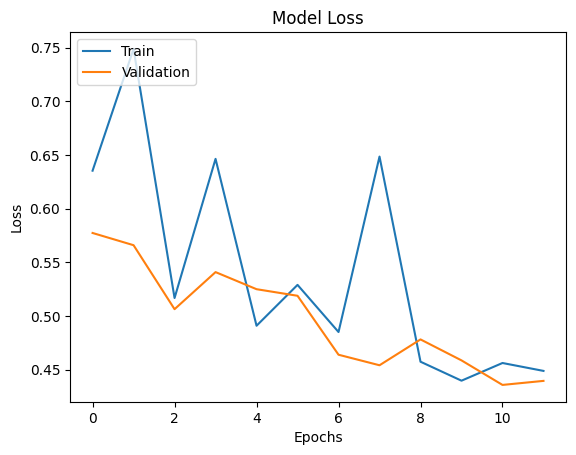

In [ ]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('Model Loss')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(test_generator,steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc}')

 5/12 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.7906 - loss: 0.4634

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


11/12 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.8064 - loss: 0.4298 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 87s 7s/step - accuracy: 0.8085 - loss: 0.4252
Test Accuracy: 0.8203125


In [ ]:
model.save('FFD.keras')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('FFD.keras')

def predict_fire(img_path):
  img=image.load_img(img_path,target_size=(img_width,img_height))
  img_array=image.img_to_array(img)
  img_array=img_array/255.0
  img_array=np.expand_dims(img_array,axis=0)
  prediction=model.predict(img_array)
  if prediction>0.5:
    predicted_class=class_names[1]
    print('no Fire Detected')
  else:
    predicted_class=class_names[0]
    print('Fire Detected')
  plt.imshow(img)
  plt.title(f'Prediction: {predicted_class}')
  plt.axis('off')
  plt.show()

In [ ]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire')

['29071683967_b1ed99cb89_o.jpg',
 '9570772331_0822c9b670_o.jpg',
 'malachi-brooks-lhZ61YqYhnA-unsplash.jpg',
 '28537699003_1a422593ca_o.jpg',
 '51404893429_95e004cb03_o.jpg',
 '26131736898_9e6a8cd68f_o.jpg',
 '50622961901_b344261876_o.jpg',
 '35410741240_4dde737981_o.jpg',
 '20960888741_8c4be2c1df_o.jpg',
 '52230132421_efbcf13fe2_o.png',
 '52291063924_0a29bb857f_o.jpg',
 '9600858470_9d349a2271_o.jpg',
 '52390706166_2ef8a61765_o.jpg',
 '37342470222_39ab7a0005_o.jpg',
 '19196558588_267f24b847_o.jpg',
 '50622019883_c988dcf6ba_o.jpg',
 '33116128054_0169df2131_o.jpg',
 '32923781413_197187fc02_o.jpg',
 '50380847162_24a484981b_o.jpg',
 '52561565423_bbc7b2daf8_o.jpg',
 '27389369514_cd30397ac2_o.jpg',
 '51339519791_6c87189d8b_o.jpg',
 '26549039025_b4cce14ec7_o.jpg',
 '51840740529_300582b71b_o.jpg',
 '36171933842_96ffbd3205_o.jpg',
 '51236039150_95c87d9260_o.jpg',
 '8469662828_371dbcb70d_o.jpg',
 '52871185823_2561dcb25a_o.jpg',
 '28347651877_ce21ed134e_o.png',
 '35436611810_9b938fc10c_o.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
no Fire Detected


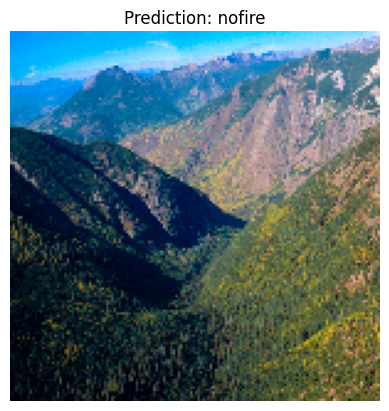

In [ ]:
predict_fire("/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/23289748533_1a14a0f249_o.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Fire Detected


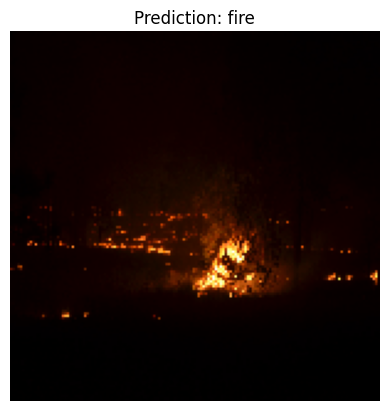

In [ ]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/27335331950_39b376eddd_o.jpg')